In [1]:
from neuralnet.neuralnet import *
from neuralnet import plotter
from neuralnet import functions

## NeuralNet - Check Visualization Functions

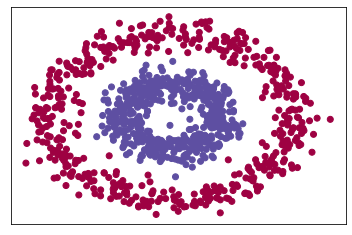

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_blobs

# Create Artificial Dataset
X, Y = make_circles(1000, noise=0.1, factor=0.4, shuffle=True)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Spectral")
plt.xticks([])
plt.yticks([])
plt.show()

# Split on test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=10)

### Training

In [17]:
%matplotlib inline
nn = NeuralNet(
    layer_shapes=(
        (2, 100),
        (100, 100),
        (100, 1),
    ),
    cost_function=functions.cross_entropy
)

nn.optimize(Xtrain, Ytrain, epochs=2000, batch_size=64, learning_rate=5e-2, show_after=200)

Epoch 0 | Error: -0.029417676 | WV0: -7.198e-06 | WV1: 5.9731e-05
Epoch 200 | Error: 0.05021847 | WV0: 0.000343813 | WV1: -0.001000885
Epoch 400 | Error: 0.175285762 | WV0: 0.000223565 | WV1: -0.004991699
Epoch 600 | Error: 0.205527491 | WV0: -0.006724162 | WV1: -0.009606418
Epoch 800 | Error: -0.000254138 | WV0: 0.000221909 | WV1: -0.00052065
Epoch 1000 | Error: -0.000890024 | WV0: 0.000300365 | WV1: -7.1758e-05
Epoch 1200 | Error: 5.339e-05 | WV0: 6.5192e-05 | WV1: -9.8839e-05
Epoch 1400 | Error: 6.0778e-05 | WV0: 4.213e-05 | WV1: -7.481e-05
Epoch 1600 | Error: 6.1191e-05 | WV0: -3.4421e-05 | WV1: -6.3959e-05
Epoch 1800 | Error: -0.000127375 | WV0: 5.1833e-05 | WV1: -1.9692e-05


### Validation

In [18]:
train_forwards = nn.forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

forwards = nn.forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Training Set: 100.0%
Precission on Test set: 100.0%


In [19]:
colors = np.around(forwards[-1]).astype("str")
colors[colors == "0.0"] = "salmon"
colors[colors == "1.0"] = "skyblue"

### Prediction plot on test set

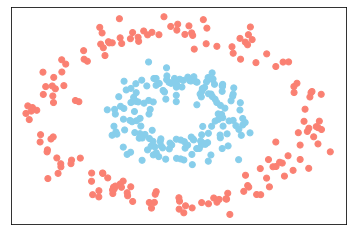

In [20]:
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=colors.flatten())
plt.xticks([])
plt.yticks([])
plt.show()

### Decision Function

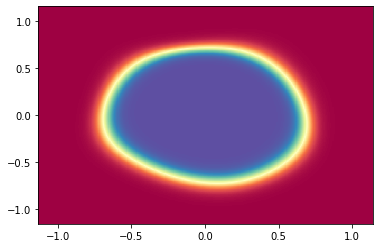

In [21]:
plotter.plot_decision_function(Xtest[:, 0], Xtest[:, 1], nn)

### Error History

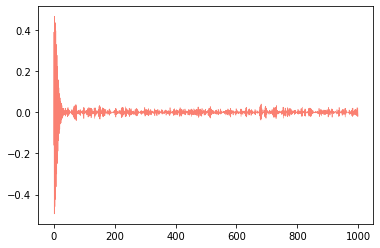

In [14]:
nn.ophist.plot_error()